In [1]:
"""
Arjun Srivastava
arj1
AMATH 301 B
"""

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import scipy.optimize

Error for Lambda=0: 0.00045476672565031295
Error for Lambda=-10: 1.6116112102337876e-05
Error for Lambda=-2100: 1.452516463920426e+76


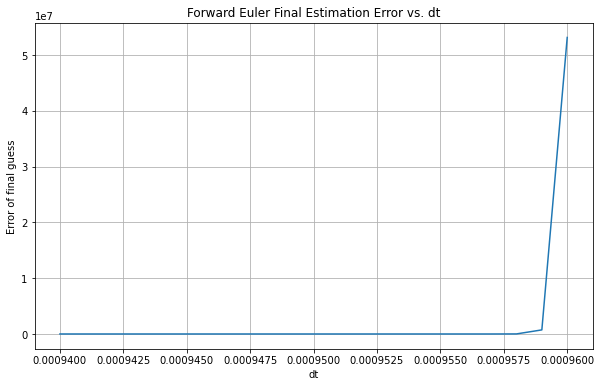

In [3]:
# Problem 1

dxdt = lambda t, x : lam * (x - np.cos(t)) - np.sin(t)
x_true = lambda t : np.cos(t) 
x0 = 1

# a)

lam = 0
dt = 0.001
t = np.arange(0, 2 + dt, dt)

n = t.size
x = np.zeros(n)
x[0] = x0
for k in range(n-1):
    x[k + 1] = x[k] + dt * (lam * (x[k] - np.cos(t[k])) - np.sin(t[k]))
    
last_error = np.abs(x[n-1] - x_true(2))
print('Error for Lambda=0:', last_error)

"""
The error of the final observation when lambda = 0 is 0.00045476672565031295
"""

# b)

lam = -10
x1 = np.zeros(n)
x1[0] = x0
for k in range(n-1):
    x1[k + 1] = x1[k] + dt * (lam * (x1[k] - np.cos(t[k])) - np.sin(t[k]))

last_error1 = np.abs(x1[n-1] - x_true(2))
print('Error for Lambda=-10:', last_error1)

"""
The error of the final observation when lambda = -10 is 1.6116112102337876e-05
"""

# c)

lam = -2100
x2 = np.zeros(n)
x2[0] = x0
for k in range(n-1):
    x2[k + 1] = x2[k] + dt * (lam * (x2[k] - np.cos(t[k])) - np.sin(t[k]))

last_error2 = np.abs(x2[n-1] - x_true(2))
print('Error for Lambda=-2100:', last_error2)

"""
The error of the final observation when lambda = -2100 is 1.452516463920426e+76
"""

# d)

dts = np.linspace(0.000940, 0.000960, 21)
err = []
for dt in dts:
    t = np.arange(0, 2 + dt, dt)
    n = t.size
    x3 = np.zeros(n)
    x3[0] = x0
    for k in range(n-1):
        x3[k + 1] = x3[k] + dt * (lam * (x3[k] - np.cos(t[k])) - np.sin(t[k]))
    last_error3 = np.abs(x3[n-1] - x_true(2))
    err.append(last_error3)
    
plt.figure(figsize=(10, 6))
plt.grid()
plt.title('Forward Euler Final Estimation Error vs. dt')
plt.xlabel('dt')
plt.ylabel('Error of final guess')
plt.plot(dts, err)

In [16]:
# e)

dt = dts[15]
print('Errors:', err, sep='\n')
print('\nDiverging starts at dt =', dt)

"""
At dt = 0.000955, the error starts to increase at a very fast rate as it diverges. Starting at 0.02158417032409682, the error
rapidly climbs to over 50 million in fewer than 5 steps. As such, this is the value of dt for which the Euler approximation
becomes unstable.
"""

# f)

"""
We know the forward Euler approximation becomes unstable when |1 + Δtλ| > 1. As such, we can plug in λ = -2100 and solve for Δt
|1 + -2100Δt| > 1
1 - 2100Δt < -1 or 1 - 2100Δt > 1
-2100Δt < -2 or -2100Δt > 0
Δt > 2/2100 or Δt < 0, ignore 0 case because dt must be positive
Δt > 1/1050.

The forward Euler approximation becomes unstable when Δt = 1 / 1050.

This value (0.0009523809523809524) is very close to our other Δt value of 0.000955
"""
print("The forward Euler approximation becomes unstable when Δt = 1 / 1050:", 1/1050)

Errors:
[0.00029104703451221514, 0.0005146889774450547, 0.0007346698647808791, 9.374885021118384e-05, 0.00030559400862761876, 0.0005137803122423623, 0.0007183088948231608, 5.82879944294179e-05, 0.0002546809181127041, 0.0004474180465468547, 0.0006365004363204085, 0.0008219296044041369, 0.00013826054362447993, 0.0003121271778689372, 0.00020902878845047157, 0.02158417032409682, 1.7342766193619907, 131.73089820074117, 9903.707763703924, 731806.1286246231, 53150742.95838515]

Diverging starts at dt = 0.000955
The forward Euler approximation becomes unstable when Δt = 1 / 1050: 0.0009523809523809524


C:\Users\arjun\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


'\nLooking at the graph, it is clear that this function is stable as it seems to converge somewhere somewhere around 3.5\n'

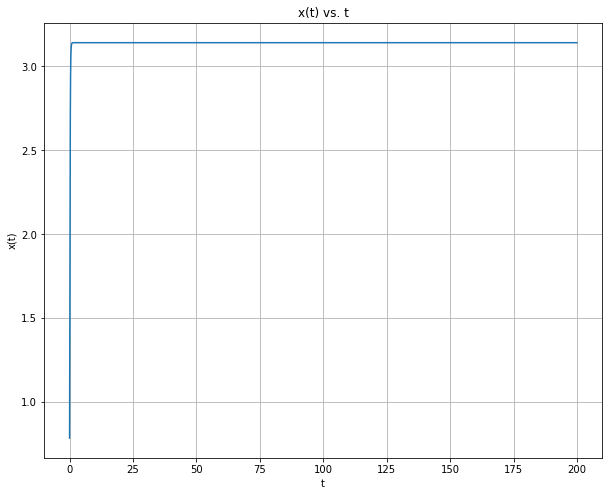

In [5]:
# Problem 2

dxdt = lambda t, x : 8 * np.sin(x)
x_true = lambda t : 2 * np.arctan(np.exp(8*t) / (1 + np.sqrt(2)))
x0 = np.pi / 4

# a)

t = np.arange(0, 200, 0.1)
plt.figure(figsize=(10, 8))
plt.plot(t, x_true(t))
plt.grid()
plt.title('x(t) vs. t')
plt.ylabel('x(t)')
plt.xlabel('t')

"""
Looking at the graph, it is clear that this function is stable as it seems to converges to an asymptote at around 3.5.
"""

C:\Users\arjun\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


'\nThe global error is rounded to 0\nThe maximum error is 0.09580146524420718\n\nThe approximation is stable, as it seems to converge to the true function.\n'

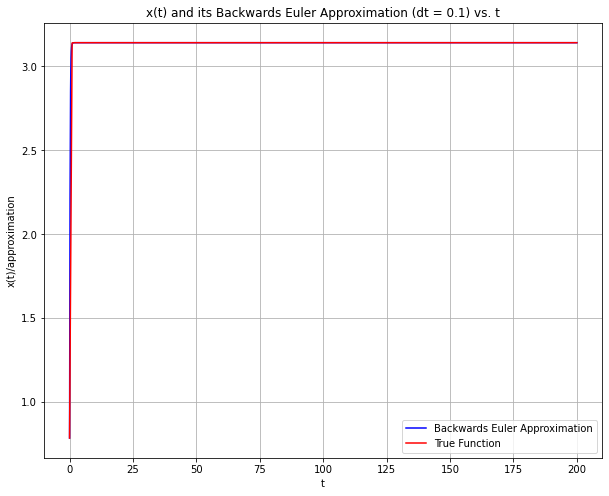

In [6]:
# b)

dt = 0.1
t = np.arange(0, 200 + dt, dt)
tplot = np.linspace(0, 200, 200)

n = t.size
x = np.zeros(n)
x[0] = x0
z0 = 3

for k in range(n-1):
    f = lambda x1 : x1 - x[k] - 8 * dt * np.sin(x1)
    z = scipy.optimize.fsolve(f, z0)
    x[k + 1] = z

global_err = np.abs(x[n-1] - x_true(200))  # 0.0
max_err = np.max(np.abs(x - x_true(t)))  # 0.09580146524420718

plt.figure(figsize=(10, 8))
plt.grid()
plt.title('x(t) and its Backwards Euler Approximation (dt = 0.1) vs. t')
plt.xlabel('t')
plt.ylabel('x(t)/approximation')
plt.plot(t, x, 'b', tplot, x_true(tplot), 'r')
plt.legend(['Backwards Euler Approximation', 'True Function'])

"""
The global error is rounded to 0
The maximum error is 0.09580146524420718

The approximation is stable, as it seems to converge to the true function.
"""

C:\Users\arjun\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


0.738187199491434

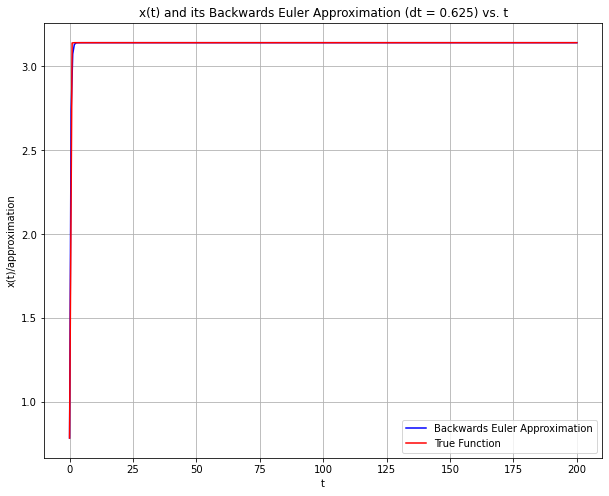

In [20]:
# c)

dt = 0.625
t = np.arange(0, 200 + dt, dt)
tplot = np.linspace(0, 200, 200)

n = t.size
x = np.zeros(n)
x[0] = x0
z0 = 3

for k in range(n-1):
    f = lambda x1 : x1 - x[k] - 8 * dt * np.sin(x1)
    z = scipy.optimize.fsolve(f, z0)
    x[k + 1] = z

global_err = np.abs(x[n-1] - x_true(200))  # 0.0
max_err = np.max(np.abs(x - x_true(t)))  # 0.369093599745717

plt.figure(figsize=(10, 8))
plt.grid()
plt.title('x(t) and its Backwards Euler Approximation (dt = 0.625) vs. t')
plt.xlabel('t')
plt.ylabel('x(t)/approximation')
plt.plot(t, x, 'b', tplot, x_true(tplot), 'r')
plt.legend(['Backwards Euler Approximation', 'True Function'])

"""
The global error is rounded to 0
The maximum error is 0.369093599745717

The approximation is stable, as it seems to converge to the true function.
"""

# d)

"""
After experimenting with numerous values both smaller and greater than 1, all of the approximations stayed stable.
"""

C:\Users\arjun\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


'\nThe global error is 0.0\nThe maximum error is 0.13842880776331445\n\nThis approximation is stable as the approximation converges to the true function.\n'

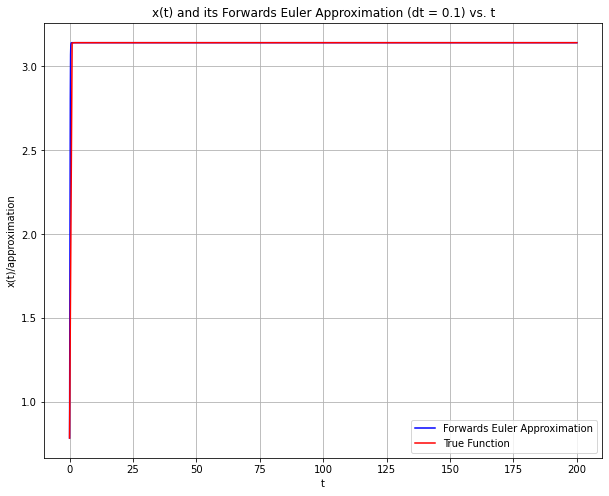

In [8]:
# e)

dt = 0.1
t = np.arange(0, 200 + dt, dt)
n = t.size
x = np.zeros(n)
tplot = np.linspace(0, 200, 200)

x[0] = x0
for k in range(n-1):
    x[k + 1] = x[k] + dt * 8 * np.sin(x[k])

global_err = np.abs(x[n-1] - x_true(200))  # 0.0
max_err = np.max(np.abs(x - x_true(t)))  # 0.13842880776331445

plt.figure(figsize=(10, 8))
plt.grid()
plt.title('x(t) and its Forwards Euler Approximation (dt = 0.1) vs. t')
plt.xlabel('t')
plt.ylabel('x(t)/approximation')
plt.plot(t, x, 'b', tplot, x_true(tplot), 'r')
plt.legend(['Forwards Euler Approximation', 'True Function'])

"""
The global error is 0.0
The maximum error is 0.13842880776331445

This approximation is stable as the approximation converges to the true function.
"""

C:\Users\arjun\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


77.9454255505215

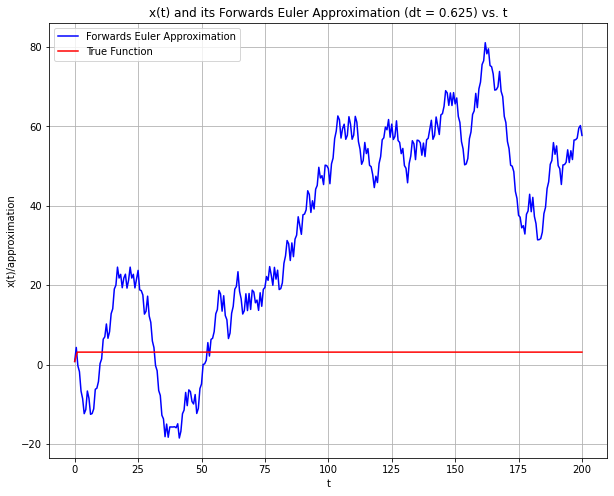

In [18]:
# f)

dt = 0.625
t = np.arange(0, 200 + dt, dt)
n = t.size
x = np.zeros(n)
tplot = np.linspace(0, 200, 200)

x[0] = x0
for k in range(n-1):
    x[k + 1] = x[k] + dt * 8 * np.sin(x[k])

global_err = np.abs(x[n-1] - x_true(200))  # 54.58443979220196
max_err = np.max(np.abs(x - x_true(t)))  # 77.9454255505215

plt.figure(figsize=(10, 8))
plt.grid()
plt.title('x(t) and its Forwards Euler Approximation (dt = 0.625) vs. t')
plt.xlabel('t')
plt.ylabel('x(t)/approximation')
plt.plot(t, x, 'b', tplot, x_true(tplot), 'r')
plt.legend(['Forwards Euler Approximation', 'True Function'])

"""
The global error is 54.58443979220196
The maximum error is 77.9454255505215

This approximation is unstable as the approximation diverges from the true function and approaches infinity as t increases
"""
max_err

C:\Users\arjun\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


'\nAfter experimenting with numerous different values for dt, I have concluded that the function begins to diverge between 0.57\nand 0.58. Although the approximation oscillates erratically at 0.57, it still converges at the true function. At 0.58, however,\nthe approximation seems to be diverging from the true function, as shown in the graph below.\n'

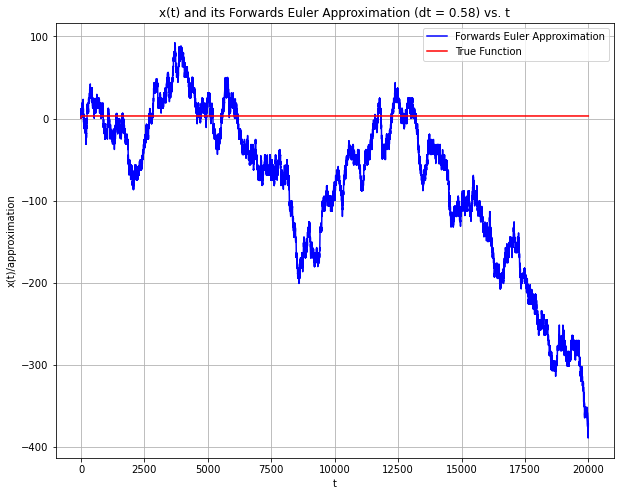

In [13]:
# g)

dt = 0.58
t = np.arange(0, 20000 + dt, dt)
n = t.size
x = np.zeros(n)
tplot = np.linspace(0, 20000, 20000)

x[0] = x0
for k in range(n-1):
    x[k + 1] = x[k] + dt * 8 * np.sin(x[k])

plt.figure(figsize=(10, 8))
plt.grid()
plt.title('x(t) and its Forwards Euler Approximation (dt = 0.58) vs. t')
plt.xlabel('t')
plt.ylabel('x(t)/approximation')
plt.plot(t, x, 'b', tplot, x_true(tplot), 'r')
plt.legend(['Forwards Euler Approximation', 'True Function'])

"""
After experimenting with numerous different values for dt, I have concluded that the function begins to diverge between 0.57
and 0.58. Although the approximation oscillates erratically at 0.57, it still converges at the true function. At 0.58, however,
the approximation seems to be diverging from the true function, as shown in the graph below.
"""